<a href="https://colab.research.google.com/github/dayaYanez/MLTSA25_DYanez/blob/main/Lab3_class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = "https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG = pd.read_csv(url)
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [ ]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [ ]:
grbAG.tail(5)

,filter,time,mag,magerr,upperlimit
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1
118,V,1171176,NaN,21.16,1


In [ ]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr()

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


<Axes: xlabel='time', ylabel='mag'>

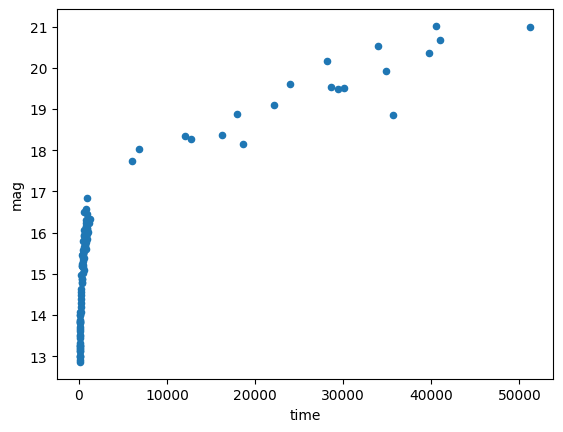

In [ ]:
grbAG.plot(x="time", y="mag", kind="scatter")

In [ ]:
import numpy as np
x = np.arange(0,100,0.1)
y = x.copy()

<ipython-input-18-8ad9466a2150>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x,np.log10(y))


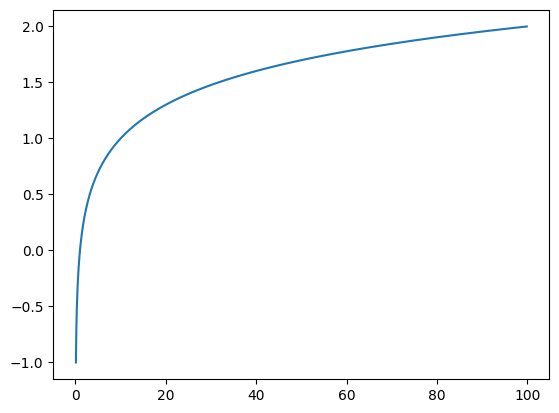

In [ ]:
import pylab as plt
plt.plot(x,np.log10(y))

In [ ]:
grbAG['logtime'] = np.log10(grbAG.loc[:,"time"])

In [ ]:
ax = grbAG.plot(x="logtime", y="mag", kind="scatter", yerr="mager")

KeyError: 'mager'

In [ ]:
x = grbAG["logtime"].value()
X = np.c_[np.ones_likes(x), x]
X

KeyError: 'logtime'

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x= grbAG["logtime"]
y = grbAG["mag"]
lt.fit(x,y)

NameError: name 'lt' is not defined

In [ ]:
x = grbAG.loc[:, "logtime"].values  #return an array in numpy array

KeyError: 'logtime'

In [ ]:
y = grbAG['mag'].values
y

array([13.21      , 12.9       , 12.86      , 13.01      , 12.97      ,
       13.31      , 13.13      , 13.01      , 13.13      , 13.26      ,
       13.18      , 13.24      , 13.25      , 13.51      , 13.44      ,
       13.67      , 13.48      , 13.62      , 13.86      , 13.7       ,
       13.83      , 13.81      , 13.84      , 13.87      , 14.06      ,
       14.        , 14.01      , 14.08      , 14.18903433, 14.29714678,
       14.38453778, 14.47292871, 14.56755795, 14.64      , 14.96903433,
       14.86714678, 14.76453778, 14.87292871, 15.17755795, 14.79      ,
       15.24903433, 15.45714678, 15.19292871, 15.00755795, 15.15453778,
       15.22      , 15.58903433, 15.78714678, 15.39453778, 15.31292871,
       15.47755795, 15.47      , 16.48903433, 15.90714678, 15.65453778,
       15.38292871, 15.09755795, 16.06      , 15.54903433, 15.94714678,
       15.69453778, 15.81292871, 15.67755795, 15.83      , 15.82903433,
       15.90714678, 15.82453778, 15.71292871, 15.59755795, 16.06

In [ ]:
y.shape #x.shape

(119,)

In [ ]:
grbAG.isna().sum()

,0
filter,0
time,0
mag,11
magerr,0
upperlimit,0


In [ ]:
grbAG_nonan = grbAG.dropna()
#grbAG.dropna(inplace=True) it would change / modify grbAG

In [ ]:
#axis =1 dromp the colunms, axis=0 raws.

In [ ]:
#redifinding x and y
x = grbAG_nonan.loc[:, "logtime"].values  #return an array in numpy array

y = grbAG_nonan['mag'].values


In [ ]:
X = np.c_[np.ones(
    len(grbAG_nonan) - grbAG_nonan.upperlimit.sum(),
     1), x]


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_


NameError: name 'X' is not defined

KeyError: 'logtime'

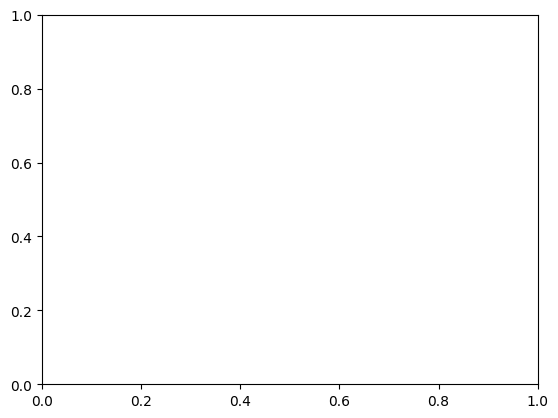

In [ ]:
from matplotlib import pylab as plt
ax = grbAG_nonan.plot(x='logtime', y="mag", kind='scatter')
ax.set_ylim(24,11)

X_range = np.array([1, grbAG_nonan['logtime'].min() ]),
